In [1]:
import numpy as np
from epyt import epanet
import ray
from ray.rllib.algorithms.algorithm import Algorithm

from esc.epanet_env import EPANETEnv


In [2]:
relative_occupant_water_demand(np.arange(-10, 0))

array([0.43711377, 0.39858181, 0.39599269, 0.35200029, 0.43999198,
       0.4183432 , 0.39488734, 0.26347688, 0.34326304, 0.45604203])

In [3]:
ray.init()

2022-11-30 21:55:23,524	INFO worker.py:1528 -- Started a local Ray instance.


Python version:,3.10.7
Ray version:,2.1.0


In [4]:
algo = Algorithm.from_checkpoint('/Users/maxdumas/Downloads/PPO_EPANETEnv_2022-11-29_22-37-56cdja2ppz/checkpoint_000301/')

2022-11-30 21:55:24,494	WARNING deprecation.py:47 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-11-30 21:55:24,498	WARNING algorithm.py:2531 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
2022-11-30 21:55:24,499	WARNING ppo.py:351 -- `train_batch_size` (4000) cannot be achieved with your other settings (num_workers=9 num_envs_per_worker=1 rollout_fragment_length=445)! Auto-adjusting `rollout_fragment_length` to 445.
2022-11-30 21:55:24,499	INFO ppo.py:379 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-11-30 21:55:24,502	INFO algorithm.py:457 -- Current log_level is ERROR. For more in

(RolloutWorker pid=19736) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19736) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=19736) 
(RolloutWorker pid=19730) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19730) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=19730) 
(RolloutWorker pid=19729) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19729) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=19729) 
(RolloutWorker pid=19732) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19732) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=19732) 
(RolloutWorker pid=19735) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19735) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=19735) 
(RolloutWorker pid=19728) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19728) Input File BUILDING.inp load

2022-11-30 21:55:30,648	WARNING util.py:66 -- Install gputil for GPU system monitoring.


In [5]:
env = EPANETEnv({})
obs = env.reset()
done = False
R = []
T = []
E = []

while not done:
    action = algo.compute_single_action(obs)
    print(action)
    obs, reward, done, _ = env.step(action)
    tank_head = obs[-2]
    E.append(obs[9] * action)
    T.append(tank_head)
    R.append(reward)

algo.stop()

EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19783) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=19783) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=19783) 
Input File BUILDING.inp loaded successfully.

0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
1
1
0
1
1
0
0
1
0
0
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
1
0
1
1
1
0
1
0
0
1
0
0
1
0
1
1
1
0
1
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

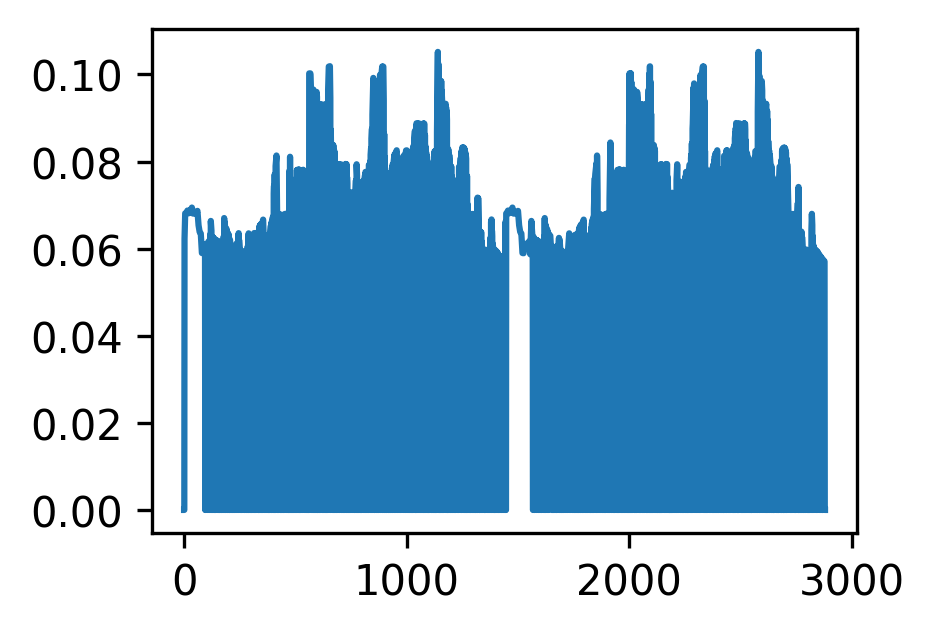

In [7]:
plt.plot(np.arange(2880), E[:2880])

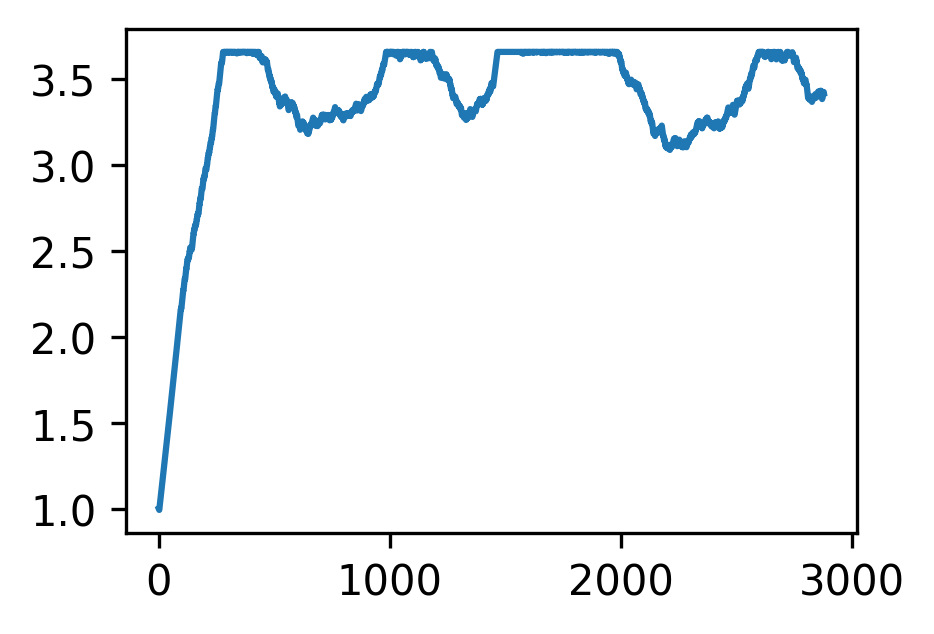

In [8]:
plt.plot(np.arange(2880), T[:2880])

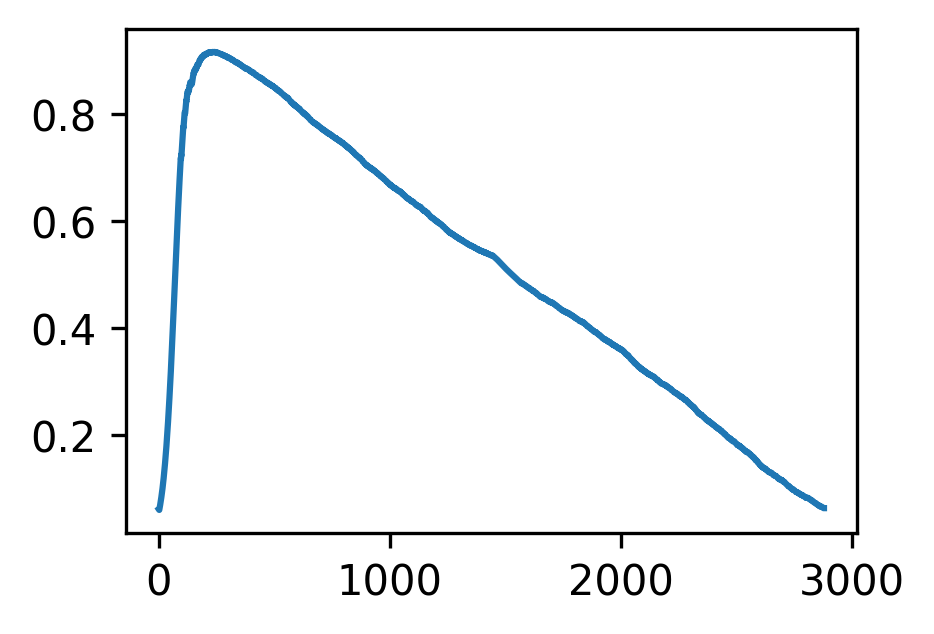

In [9]:
plt.plot(np.arange(2880), R[:2880])